In [1]:
# script to compare processing using the python toolbox and Toste's QC
import sys
sys.path.append('/home/simon/Documents/GitHub/tor_data_toolbox/python_tools') 
from OPData_Process import *
op = OPData_Process(op_data_folder = '/media/simon/Seagate Backup Plus Drive/theoceanrace/DATA/2020-07-04_Vendee Arctique')
# op = OPData_Process(op_data_folder = '/media/simon/Seagate Backup Plus Drive/theoceanrace/DATA/MALIZIA_data')
op.load_log_files()
op.derive_fCO2_pCO2() 
op.clip_data_calibration() # remove data during zero and span calibration
op.time_average_data(rule_string = 'T') # turn into 1 minute average

could not compute pCO2, likely water temp or salinity data missing


/home/simon/Documents/GitHub/tor_data_toolbox/python_tools/OPData_Process.py:109: FutureWarning: try_cast keyword is deprecated and will be removed in a future version
  self.data_cleaned = self.data_cleaned.mask(self.data_cleaned['STATUS'] != 5 ,try_cast=True)


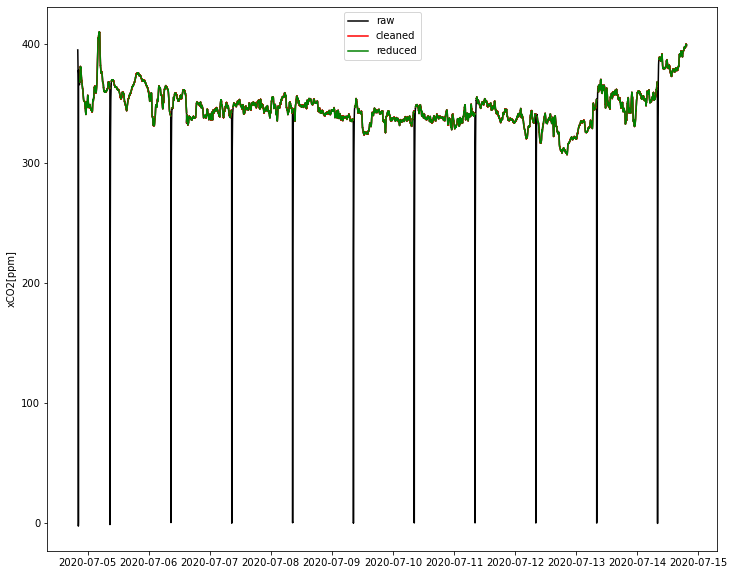

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.plot(op.data['xCO2'],'k')
plt.plot(op.data_cleaned['xCO2'],'r')
plt.plot(op.data_reduced['xCO2'],'g')
plt.ylabel('xCO2[ppm]')
plt.legend(['raw','cleaned','reduced'])

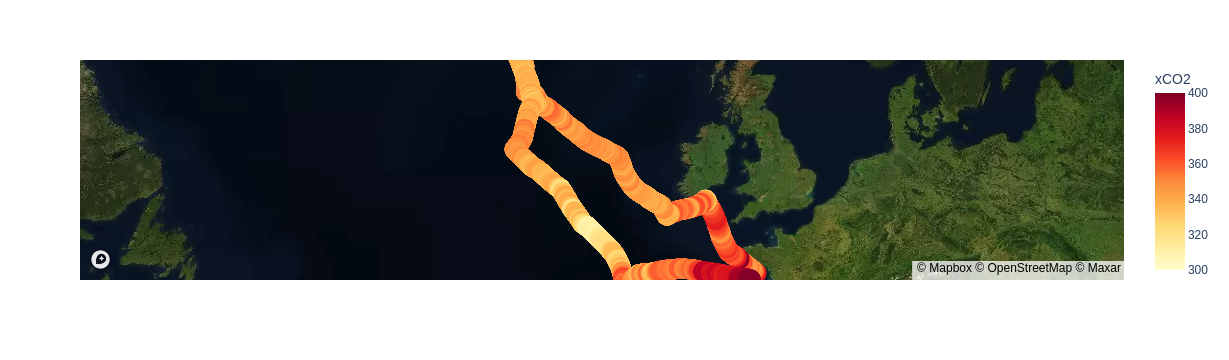

In [6]:
op.plots_mapbox(variable2plot = ['xCO2'],var_range = [[300,400]])

<Figure size 1152x720 with 0 Axes>

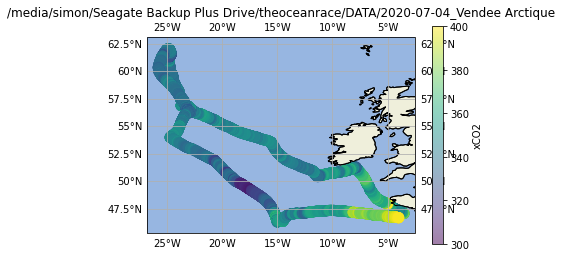

In [7]:
op.plots_cartopy(variable2plot = ['xCO2'],var_range = [[300,400]])